In [1]:
import numpy as np
import pandas as pd

In [2]:
geography = pd.read_csv("name_geographic_information.csv")
industry = pd.read_csv("base_etablissement_par_tranche_effectif.csv")
salary = pd.read_csv("net_salary_per_town_categories.csv")

######## My Data ####################################################
df_raw1 = pd.read_csv('df_fistRound_finalData.csv')
df_raw2 = pd.read_csv('df_secondRound_finalData.csv')
#####################################################################

df_raw1['Population_Adjusted'] = df_raw1['Total_Population'].apply(lambda x: x/20)

def getColor(x):
    if x == 'MACRON':
        return 'red'
    elif x == 'LE PEN':
        return 'blue'
    elif x == 'FILLON':
        return 'green'
    elif x == 'MÉLENCHON':
        return 'purple'
    else:
        return 'black'
    
df_raw1['Winner_color'] = list(map(getColor, df_raw1['Winner']))
df_raw2['Winner_color'] = list(map(getColor, df_raw2['Winner']))

In [3]:
from scipy.optimize import curve_fit
import seaborn as sns

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls

In [4]:
df_raw1['Population_Adjusted'] = df_raw1['Total_Population'].apply(lambda x: (x/100))
df_raw2['Population_Adjusted'] = df_raw2['Total_Population'].apply(lambda x: (x/100))

df_raw1['Population_Flat'] = df_raw1['Total_Population'].apply(lambda x: (x))
df_raw2['Population_Flat'] = df_raw2['Total_Population'].apply(lambda x: (x))

In [5]:
df_raw1.columns.tolist()

['Unnamed: 0',
 'Winner',
 'Joiner',
 'EU_circo',
 'code_région',
 'nom_région',
 'chef.lieu_région',
 'nom_département',
 'préfecture',
 'Constituency code',
 'Commune_x',
 'INSEE code_x',
 'latitude',
 'longitude',
 'Department code',
 'Registered',
 'Abstentions',
 'Voters',
 'None of the above(NOTA)',
 'Nulls',
 'Expressed',
 'Commune_x.1',
 'INSEE code_x.1',
 'ARTHAUD',
 'ASSELINEAU',
 'CHEMINADE',
 'DUPONT-AIGNAN',
 'FILLON',
 'HAMON',
 'LASSALLE',
 'LE PEN',
 'MACRON',
 'MÉLENCHON',
 'POUTOU',
 'Total_Population',
 'E14TST',
 'E14TS0ND',
 'E14TS1',
 'E14TS6',
 'E14TS10',
 'E14TS20',
 'E14TS50',
 'E14TS100',
 'E14TS200',
 'E14TS500',
 'genderRatio',
 'Age_Under20_prop',
 'Age_20-29_prop',
 'Age_30-39_prop',
 'Age_40-49_prop',
 'Age_50-59_prop',
 'Age_60-69_prop',
 'Age_70-79_prop',
 'Age_80Plus_prop',
 'Children_2Parents_prop',
 'Children_1Parent_prop',
 'NoChildren_Couple_prop',
 'Children_Couple_prop',
 'Children_Single_prop',
 'NoChildren_Adults_prop',
 'NoChildren_Alone_prop'

In [6]:
geography.drop(['EU_circo', 'code_région', 'éloignement', 'numéro_département', 'nom_département', 'préfecture', 'numéro_circonscription', 'codes_postaux'], axis=1, inplace=True)

geography.rename(columns={'nom_région': 'region_name',
                          'chef.lieu_région': 'region_capital',
                          'nom_commune': 'common_name',
                          'codes_postaux': 'postcodes'}, inplace=True)

############## My Data ##############################################


In [7]:
df_r1Map_data = df_raw1[['Winner_color','longitude','latitude','Population_Adjusted']]
df_r2Map_data = df_raw2[['Winner_color','longitude','latitude','Population_Adjusted']]

In [8]:
# 1
geography["longitude"] = geography["longitude"].apply(lambda x: str(x).replace(',','.'))
# 2
mask = geography["longitude"] == '-'
geography.drop(geography[mask].index, inplace=True)
# 3
geography.dropna(subset = ["longitude", "latitude"], inplace=True)
# 4
geography["longitude"] = geography["longitude"].astype(float)


############# My Data ##############################################
df_r1Map_data['longitude'] = df_r1Map_data['longitude'].apply(lambda x: str(x).replace(',','.'))

df_r1Map_data = df_r1Map_data[df_r1Map_data['longitude'] != '-']
df_r1Map_data.dropna(subset = ["longitude", "latitude"], inplace=True)

df_r1Map_data["longitude"] = df_r1Map_data["longitude"].astype(float)

######

df_r2Map_data['longitude'] = df_r2Map_data['longitude'].apply(lambda x: str(x).replace(',','.'))

df_r2Map_data = df_r2Map_data[df_r2Map_data['longitude'] != '-']
df_r2Map_data.dropna(subset = ["longitude", "latitude"], inplace=True)

df_r2Map_data["longitude"] = df_r2Map_data["longitude"].astype(float)

/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
geography.drop_duplicates(subset=["code_insee"], keep="first", inplace=True)

In [10]:
paris_lat = geography.loc[geography["common_name"] == "Paris"].iloc[0]["latitude"]
paris_lon = geography.loc[geography["common_name"] == "Paris"].iloc[0]["longitude"]

In [11]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    #lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

distances = []

for index, row in geography.iterrows():
    distances.append(haversine(row["longitude"], row["latitude"], paris_lon, paris_lat))

In [12]:
geography["distance"] = pd.Series(distances, index=geography.index)

In [13]:
industry = industry[industry["CODGEO"].apply(lambda x: str(x).isdigit())]

In [14]:
industry["CODGEO"] = industry["CODGEO"].astype(int)

In [15]:
industry['Micro'] = industry['E14TS1'] + industry['E14TS6']
industry['Small'] = industry['E14TS10'] + industry['E14TS20']
industry['Medium'] = industry['E14TS50'] + industry['E14TS100']
industry['Large_and_Enterprise'] = industry['E14TS200'] + industry['E14TS500']

industry['Sum'] = industry['E14TS1'] + industry['E14TS6'] + industry['E14TS10'] + industry['E14TS20'] + industry['E14TS50'] + industry['E14TS100'] + industry['E14TS200'] + industry['E14TS500']

In [16]:

industry['Micro%'] = industry['Micro'] * 100 / industry['Sum']
industry['Small%'] = industry['Small'] * 100 / industry['Sum']
industry['Medium%'] = industry['Medium'] * 100 / industry['Sum']
industry['Large_and_Enterprise%'] = industry['Large_and_Enterprise'] * 100 / industry['Sum']

In [17]:
relevant_columns = [
    'CODGEO',
    'LIBGEO', 'REG', 'DEP',
    'Sum', 'Micro', 'Small', 'Medium', 'Large_and_Enterprise',
    'Micro%', 'Small%', 'Medium%', 'Large_and_Enterprise%'
]
industry = industry[relevant_columns]

In [18]:
industry["DEP"] = industry["DEP"].astype(int)

In [19]:
salary = salary[salary["CODGEO"].apply(lambda x: str(x).isdigit())]

In [20]:
salary["CODGEO"] = salary["CODGEO"].astype(int)

In [21]:
full_data = industry.merge(geography, how="left", left_on = "CODGEO", right_on="code_insee")

In [22]:
full_data.head(3)

CODGEO                   LIBGEO  REG  DEP  Sum  Micro  Small  Medium  \
0    1001  L'Abergement-Clémenciat   82    1    3      3      0       0   
1    1002    L'Abergement-de-Varey   82    1    1      1      0       0   
2    1004        Ambérieu-en-Bugey   82    1  419    335     70      12   

   Large_and_Enterprise      Micro%     Small%   Medium%  \
0                     0  100.000000   0.000000  0.000000   
1                     0  100.000000   0.000000  0.000000   
2                     2   79.952267  16.706444  2.863962   

   Large_and_Enterprise%  region_name region_capital              common_name  \
0               0.000000  Rhône-Alpes           Lyon  L'Abergement-Clémenciat   
1               0.000000  Rhône-Alpes           Lyon    L'Abergement-de-Varey   
2               0.477327  Rhône-Alpes           Lyon        Ambérieu-en-Bugey   

   code_insee  latitude  longitude    distance  
0      1001.0     46.15   4.916667  358.978958  
1      1002.0     46.00   5.416667  394.127237  
2      1004.0     45.95   5.350000  395.804017

In [23]:
# Creating DataFrame containing cities with the highiest number of workplaces
top_industry = full_data.sort_values(by=["Sum"], ascending=False).head(10)

In [24]:
# Preparing information to mark cities with highiest number of workplaces
top_industry_names = top_industry["LIBGEO"].values.tolist()
top_industry_lons = top_industry["longitude"].values.tolist()
top_industry_lats = top_industry["latitude"].values.tolist()

In [25]:
lons = full_data["longitude"].values.tolist()
lats = full_data["latitude"].values.tolist()
size = (full_data["Sum"]/5).values.tolist()

In [26]:
#Prepare input values to the map for the first round
lons_r1 = df_r1Map_data['longitude'].values.tolist()
lats_r1 = df_r1Map_data['latitude'].values.tolist()
pop_r1 = df_r1Map_data['Population_Adjusted'].values.tolist()
winner_r1 = df_r1Map_data['Winner_color'].values.tolist()

In [27]:
#Prepare input values to the map for the first round
lons_r2 = df_r2Map_data['longitude'].values.tolist()
lats_r2 = df_r2Map_data['latitude'].values.tolist()
pop_r2 = df_r2Map_data['Population_Adjusted'].values.tolist()
winner_r2 = df_r2Map_data['Winner_color'].values.tolist()

/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


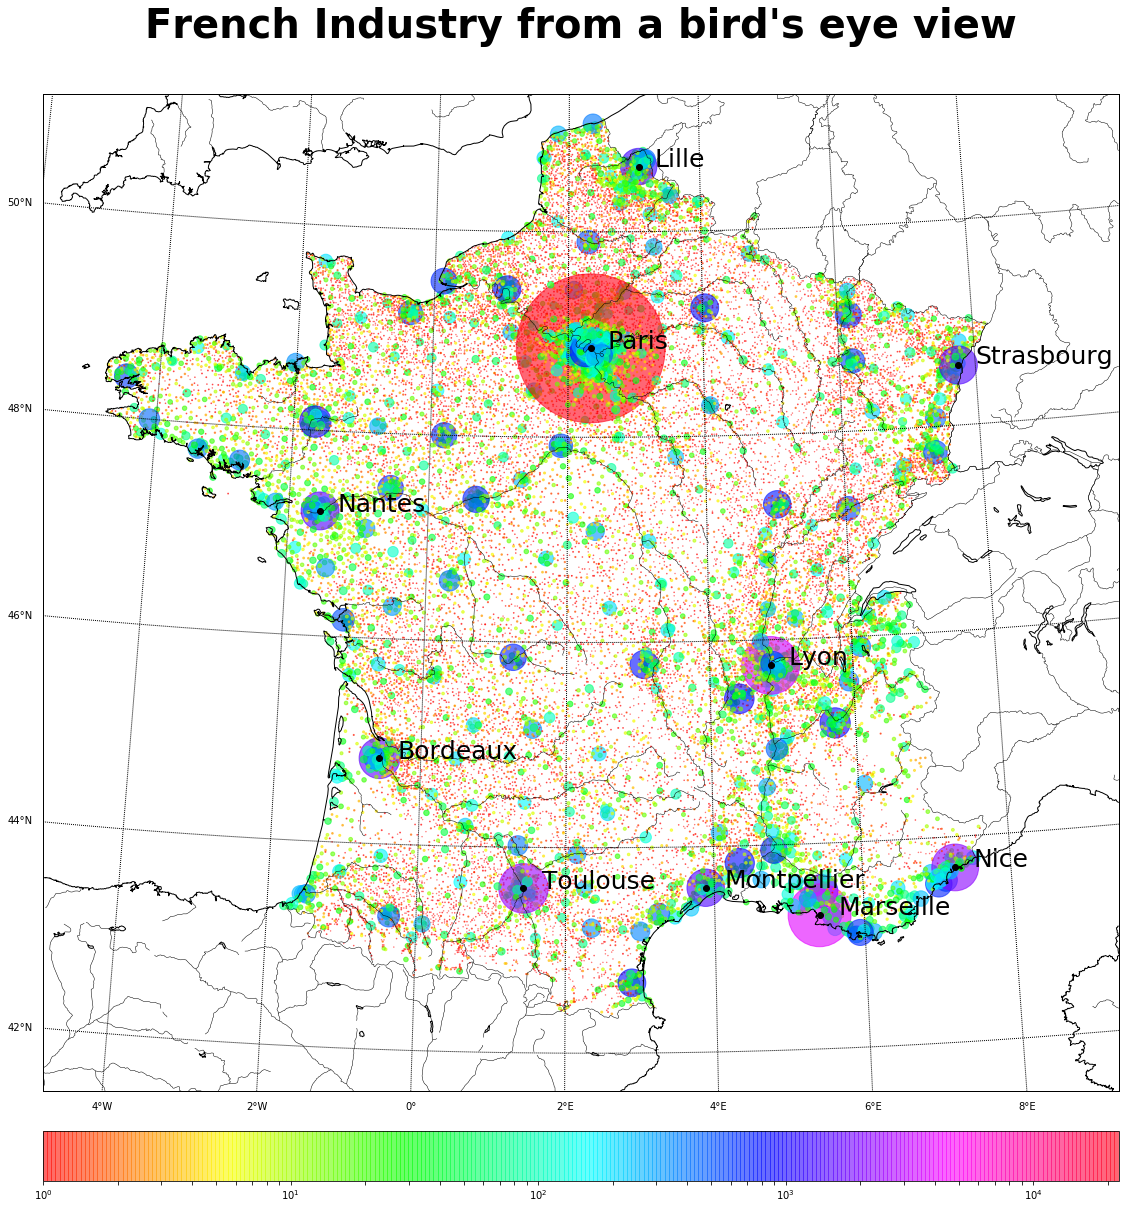

In [28]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc', 
            lat_0=46.2374,
            lon_0=2.375,
            resolution='h',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons, lats)
map.scatter(x, y, s=size, alpha=0.6, c=size, norm=colors.LogNorm(vmin=1, vmax=max(size)), cmap='hsv')
map.colorbar(location="bottom", pad="4%")

# Draw scatter plot of cities with highiest number of workplaces
x1, y1 = map(top_industry_lons, top_industry_lats)
map.scatter(x1, y1, c="black")

for i in range(len(top_industry_names)):
    plt.annotate(top_industry_names[i], xy=(map(top_industry_lons[i] + 0.25,  top_industry_lats[i])), fontsize=25)

plt.title("French Industry from a bird's eye view", fontsize=40, fontweight='bold', y=1.05)   

plt.show()

# First Round Heat Map

/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


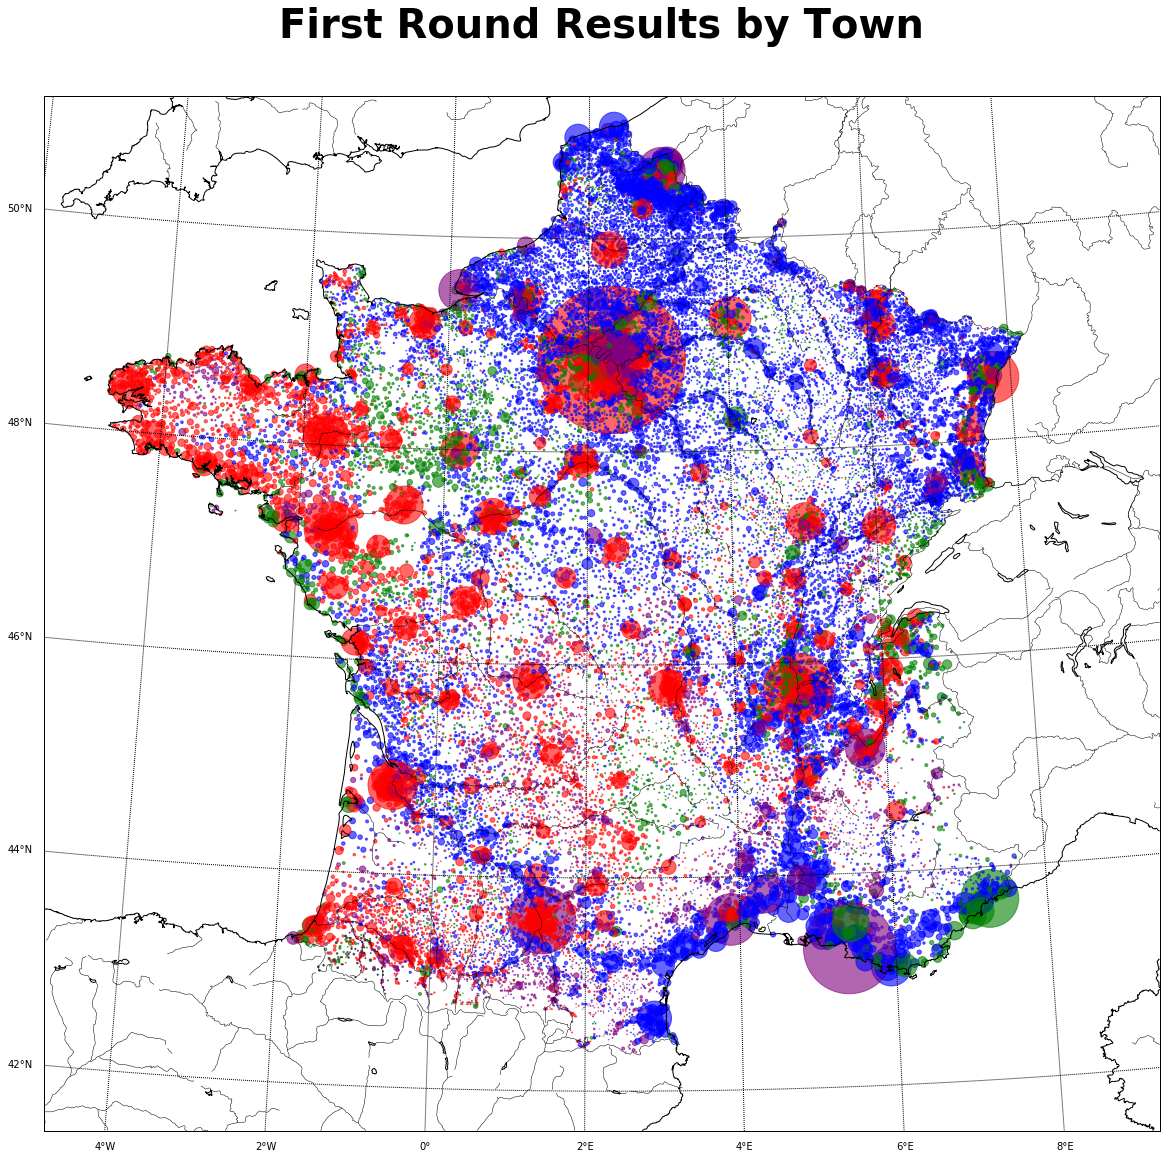

In [29]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc', 
            lat_0=46.2374,
            lon_0=2.375,
            resolution='h',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons_r1, lats_r1)
map.scatter(x, y, s=pop_r1, alpha=0.6, c=winner_r1, cmap='hsv')
#map.colorbar(location="bottom", pad="4%")

plt.title("First Round Results by Town", fontsize=40, fontweight='bold', y=1.05)   

plt.show()

/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


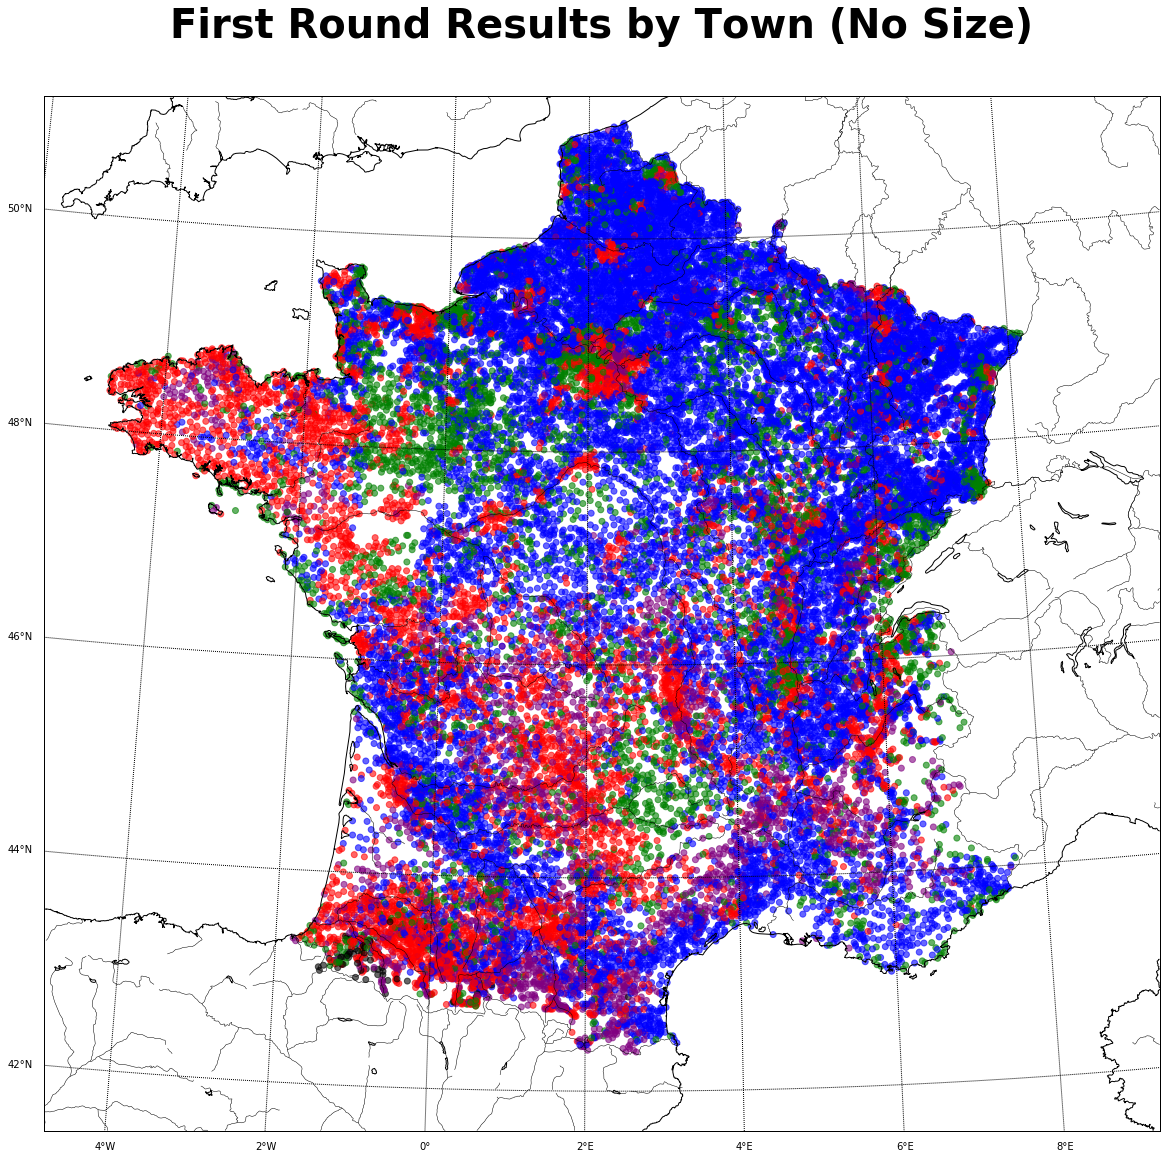

In [30]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc', 
            lat_0=46.2374,
            lon_0=2.375,
            resolution='h',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons_r1, lats_r1)
map.scatter(x, y, alpha=0.6, c=winner_r1, cmap='hsv')
#map.colorbar(location="bottom", pad="4%")

plt.title("First Round Results by Town (No Size)", fontsize=40, fontweight='bold', y=1.05)   

plt.show()

# Second Round Heat Map

/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/bradleydavies/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


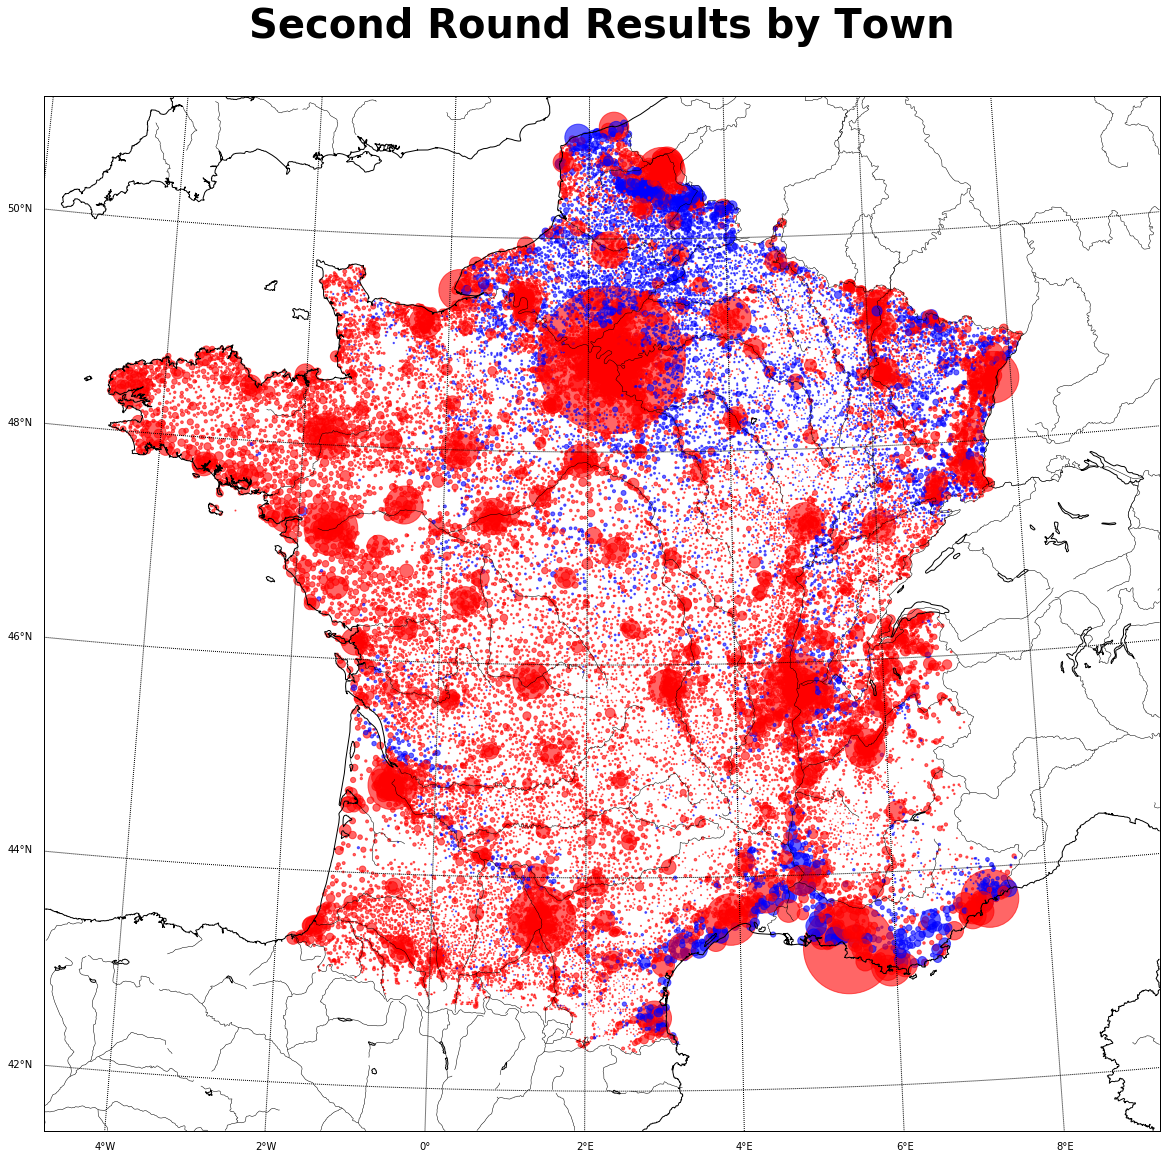

In [31]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc', 
            lat_0=46.2374,
            lon_0=2.375,
            resolution='h',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons_r2, lats_r2)
map.scatter(x, y, s=pop_r2, alpha=0.6, c=winner_r2, cmap='hsv')
#map.colorbar(location="bottom", pad="4%")

plt.title("Second Round Results by Town", fontsize=40, fontweight='bold', y=1.05)   

plt.show()